In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Visualization settings
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv("train.csv")
df['datetime'] = pd.to_datetime(df['datetime'])

In [4]:
num_cols = df.select_dtypes(include='number').columns
num_cols


Index(['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [35]:
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.day_name()
df['hour'] = df['datetime'].dt.hour


# Day period column
bins = [0, 6, 12, 18, 24]
labels = ['Night', 'Morning', 'Afternoon', 'Evening']
df['day_period'] = pd.cut(df['hour'], bins=bins, labels=labels, right=False)

1.Plot the distributions of all the numerical columns in the dataset using 
histograms.

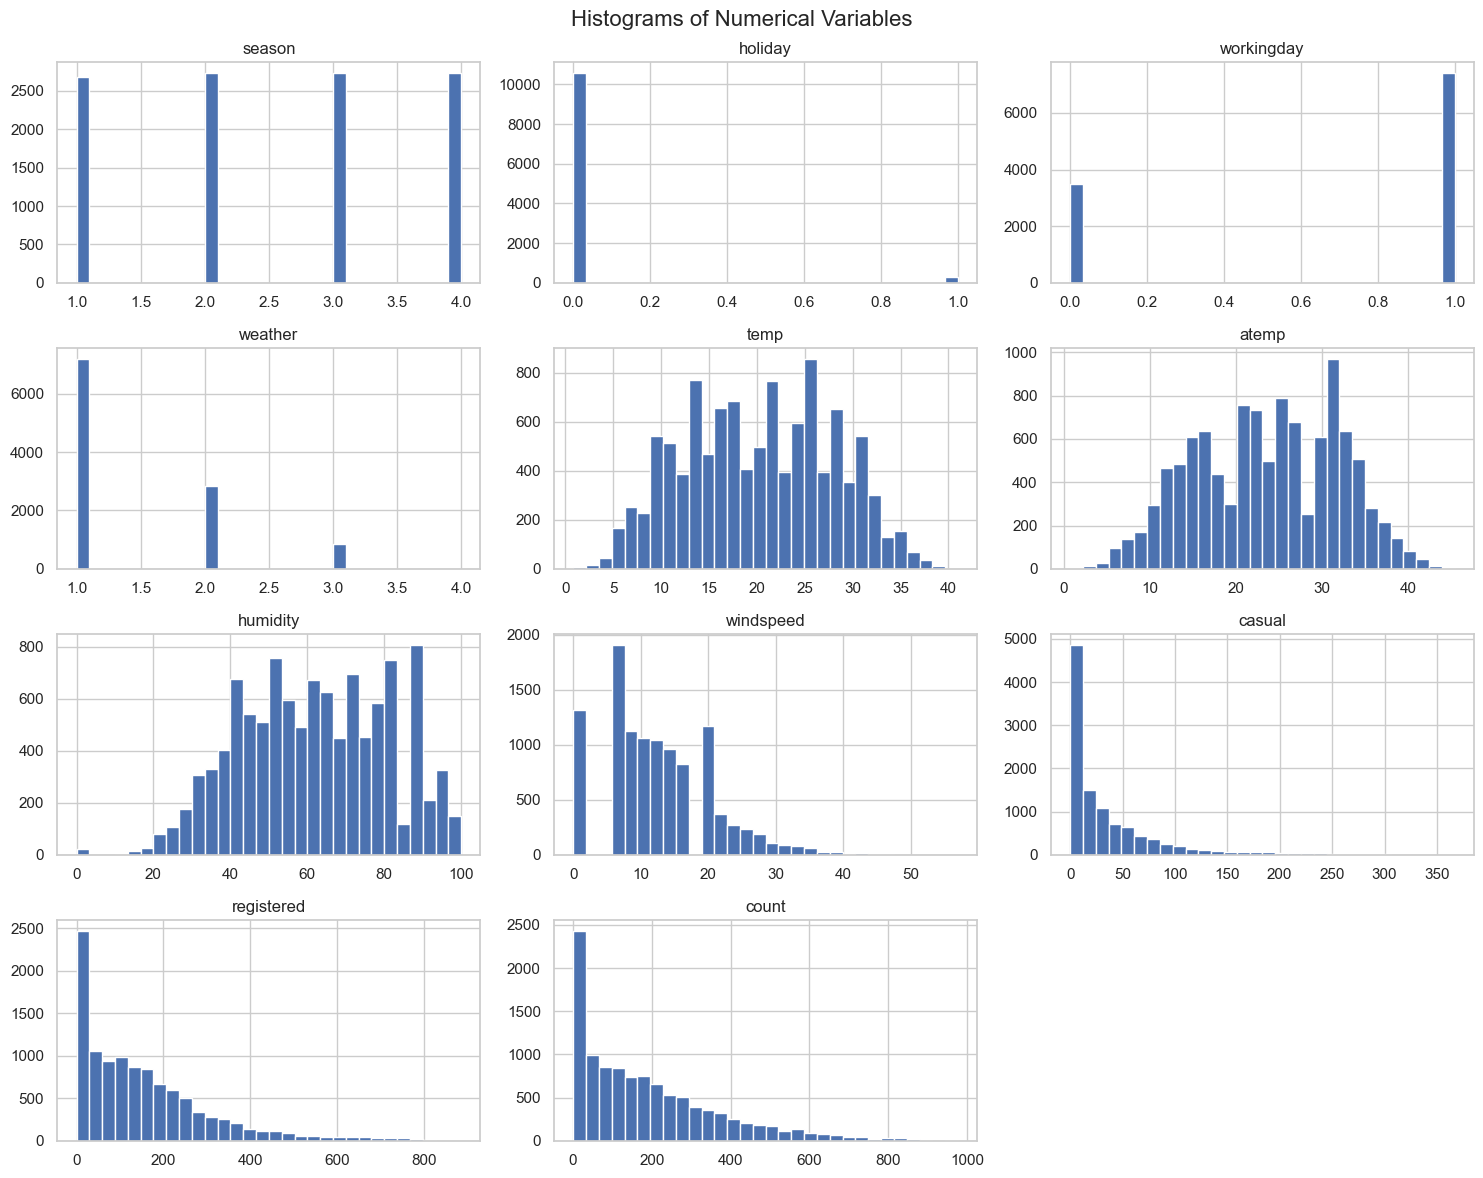

In [5]:
df[num_cols].hist(bins=30, figsize=(15,12))
plt.suptitle("Histograms of Numerical Variables", fontsize=16)
plt.tight_layout()
plt.show()


2. Plot the distributions of all the numerical columns in the dataset using box 
plots.

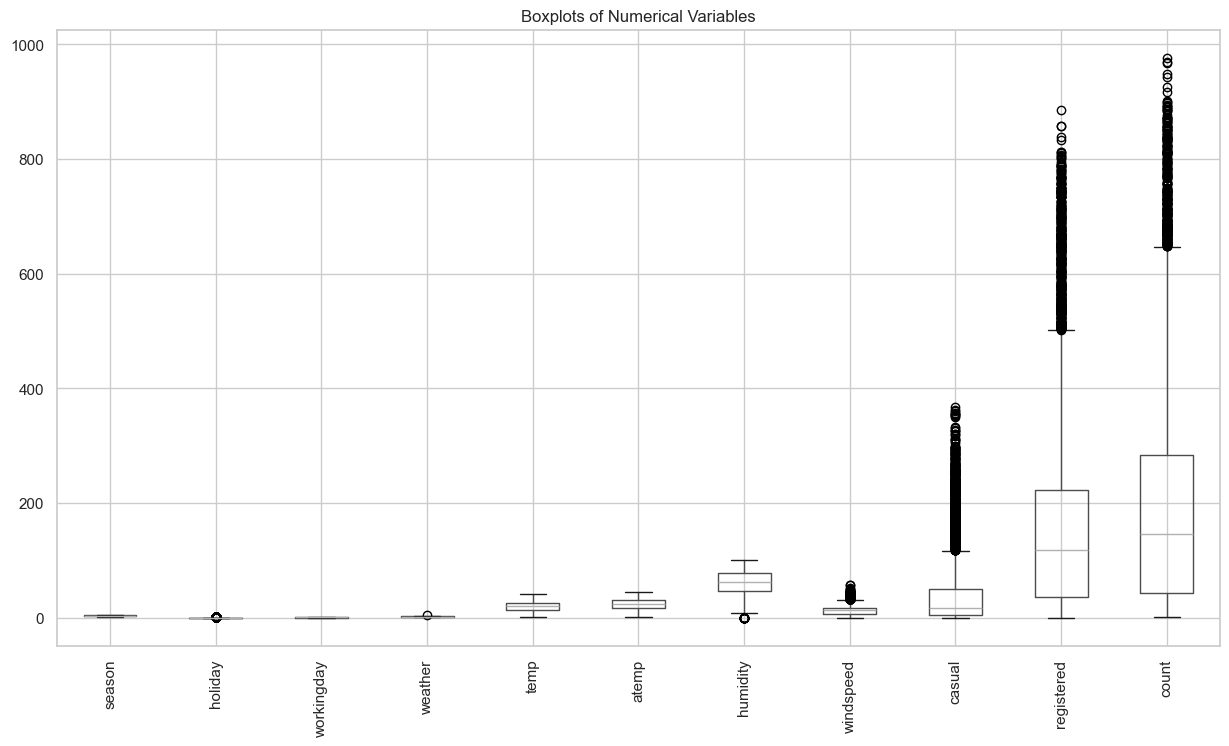

In [6]:
plt.figure(figsize=(15,8))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots of Numerical Variables")
plt.show()


3.Plot the the mean of the hourly total rentals count for working and non working days.

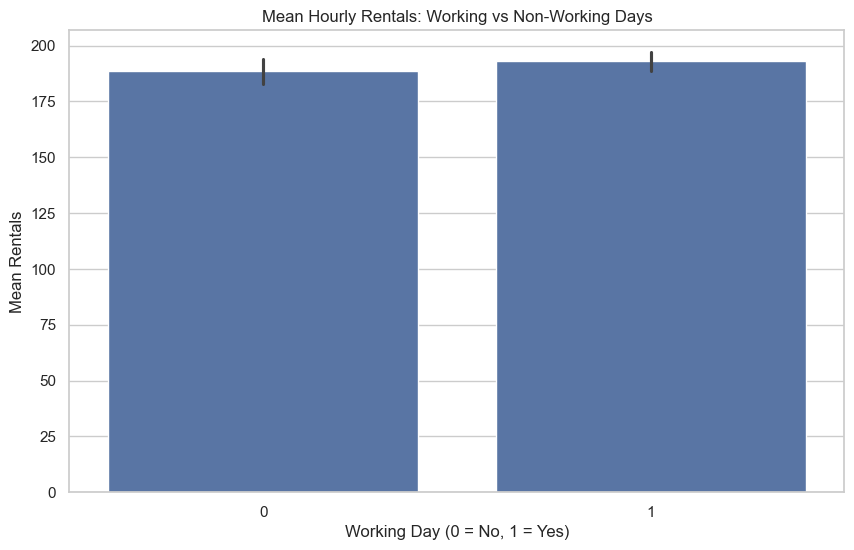

In [15]:
sns.barplot(x='workingday', y='count', data=df, estimator=np.mean)
plt.title("Mean Hourly Rentals: Working vs Non-Working Days")
plt.xlabel("Working Day (0 = No, 1 = Yes)")
plt.ylabel("Mean Rentals")
plt.show()

4.Plot the the mean of the hourly total rentals count for the different months for 
both years combined.

In [27]:
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour


In [28]:
mean_hourly_month = (
    df.groupby(["month", "hour"])["count"]
    .mean()
    .reset_index()
)


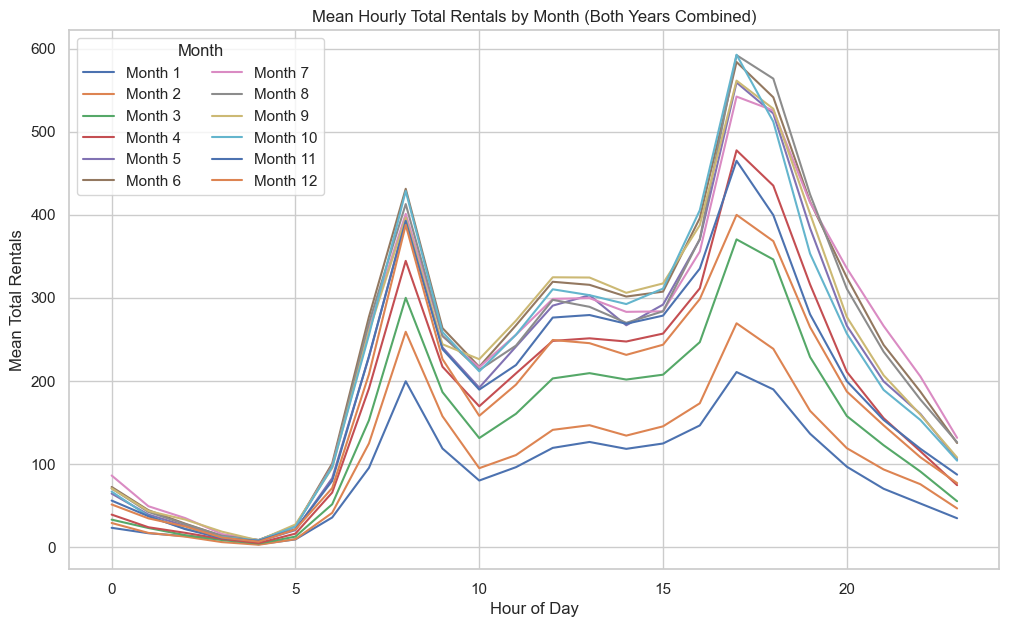

In [29]:
plt.figure(figsize=(12, 7))

for month in range(1, 13):
    month_data = mean_hourly_month[mean_hourly_month["month"] == month]
    plt.plot(
        month_data["hour"],
        month_data["count"],
        label=f"Month {month}"
    )

plt.xlabel("Hour of Day")
plt.ylabel("Mean Total Rentals")
plt.title("Mean Hourly Total Rentals by Month (Both Years Combined)")
plt.legend(title="Month", ncol=2)
plt.grid(True)
plt.show()


5.Plot the the mean of the hourly total rentals count for the different months for 
both years separately in a multi-panel figure.

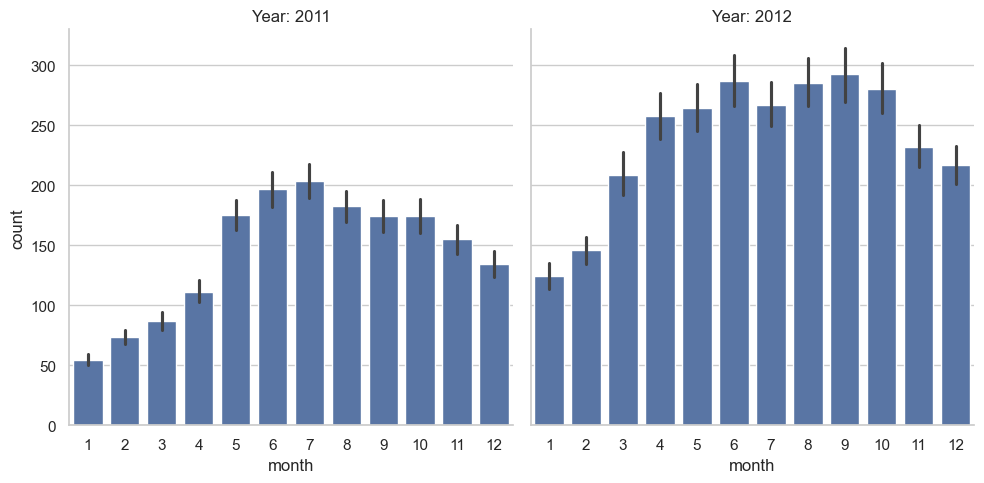

In [36]:
g = sns.FacetGrid(df, col="year", height=5, aspect=1)
g.map_dataframe(sns.barplot, x="month", y="count", estimator=np.mean)
g.set_titles("Year: {col_name}")
plt.show()

6.Plot the the mean and the 95% confidence interval of the hourly total rentals 
count for the four different weather categories. What can you observe ?

C:\Users\snehi\AppData\Local\Temp\ipykernel_23332\3716959406.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='weather', y='count', data=df, ci=95)


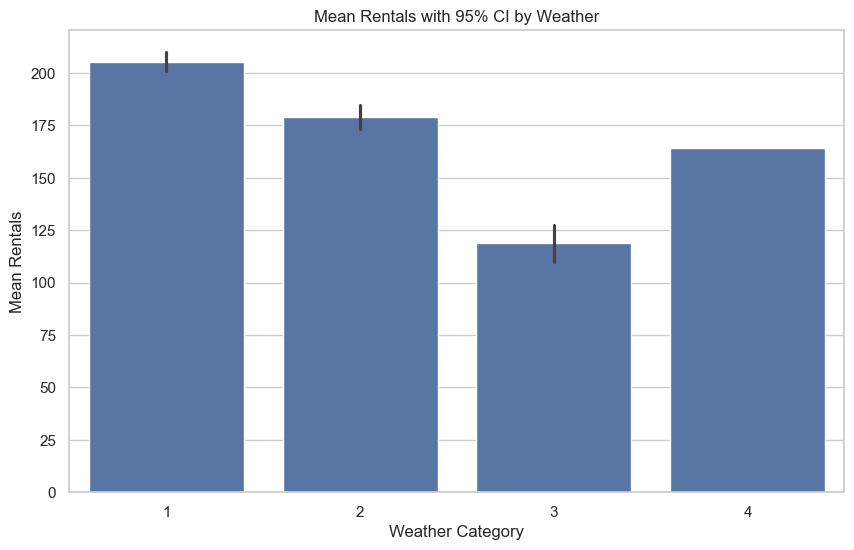

In [37]:
sns.barplot(x='weather', y='count', data=df, ci=95)
plt.title("Mean Rentals with 95% CI by Weather")
plt.xlabel("Weather Category")
plt.ylabel("Mean Rentals")
plt.show()

7.Plot the the mean of the hourly total rentals count versus the hour of the day. 
Which hours of the day have the highest rentals count ?

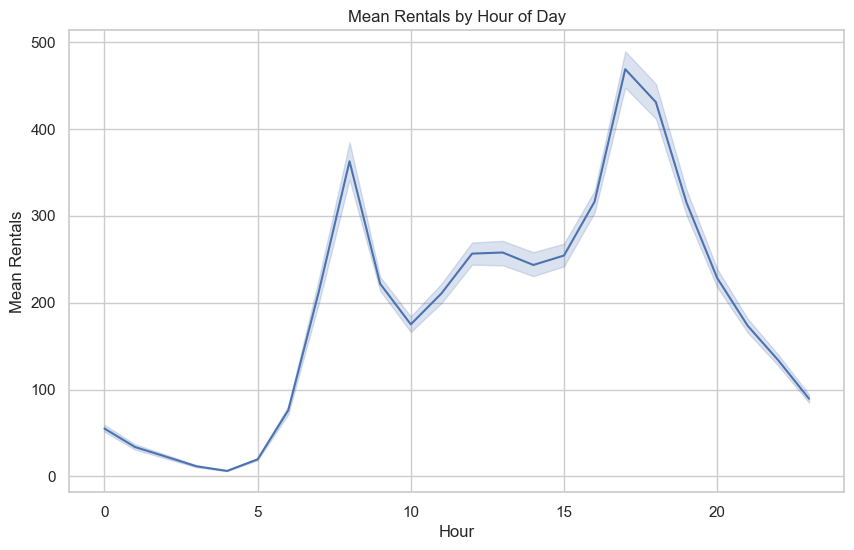

In [38]:
sns.lineplot(x='hour', y='count', data=df, estimator=np.mean)
plt.title("Mean Rentals by Hour of Day")
plt.xlabel("Hour")
plt.ylabel("Mean Rentals")
plt.show()

8.Repeat the plot in 7 for different days of the week. What patterns can you observe ?

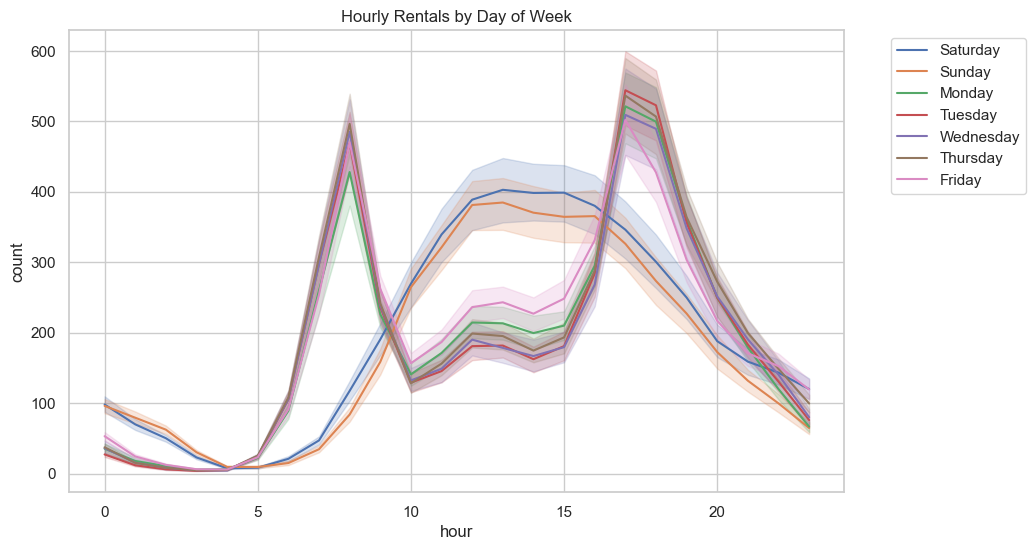

In [39]:
sns.lineplot(x='hour', y='count', hue='weekday', data=df, estimator=np.mean)
plt.title("Hourly Rentals by Day of Week")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

9.Repeat the plot in 8 for the four seasons using a multi-panel figure. What patterns can you observe ?

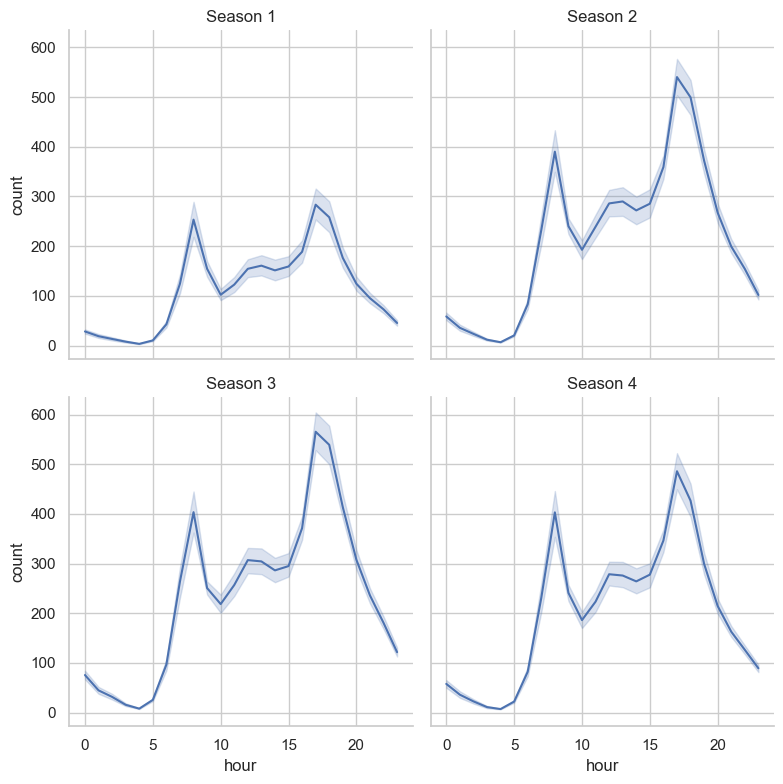

In [41]:
g = sns.FacetGrid(df, col="season", col_wrap=2, height=4)
g.map_dataframe(sns.lineplot, x="hour", y="count", estimator=np.mean)
g.set_titles("Season {col_name}")
plt.show()


10.Plot the the mean  and the 95% confidence interval of the hourly total rentals count versus the period of the day column, which you created in the first part of the assignment. Which period of the day has the highest rentals count ? 
Does this peak period differ for working and non-working days ?

C:\Users\snehi\AppData\Local\Temp\ipykernel_23332\857311730.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(x='day_period', y='count', hue='workingday', data=df, ci=95)


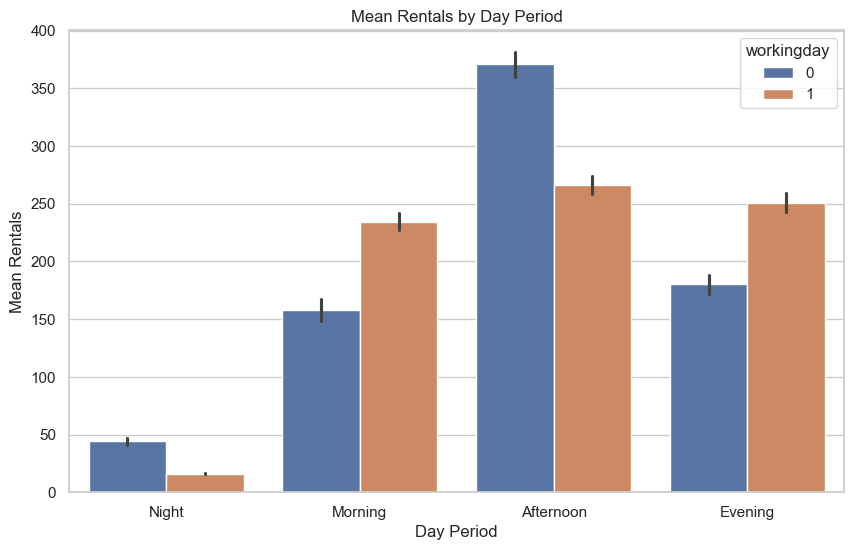

In [42]:
sns.barplot(x='day_period', y='count', hue='workingday', data=df, ci=95)
plt.title("Mean Rentals by Day Period")
plt.xlabel("Day Period")
plt.ylabel("Mean Rentals")
plt.show()

11.Plot a heatmap for the correlation matrix of the dataset numerical variables. 
What observations can you make ?

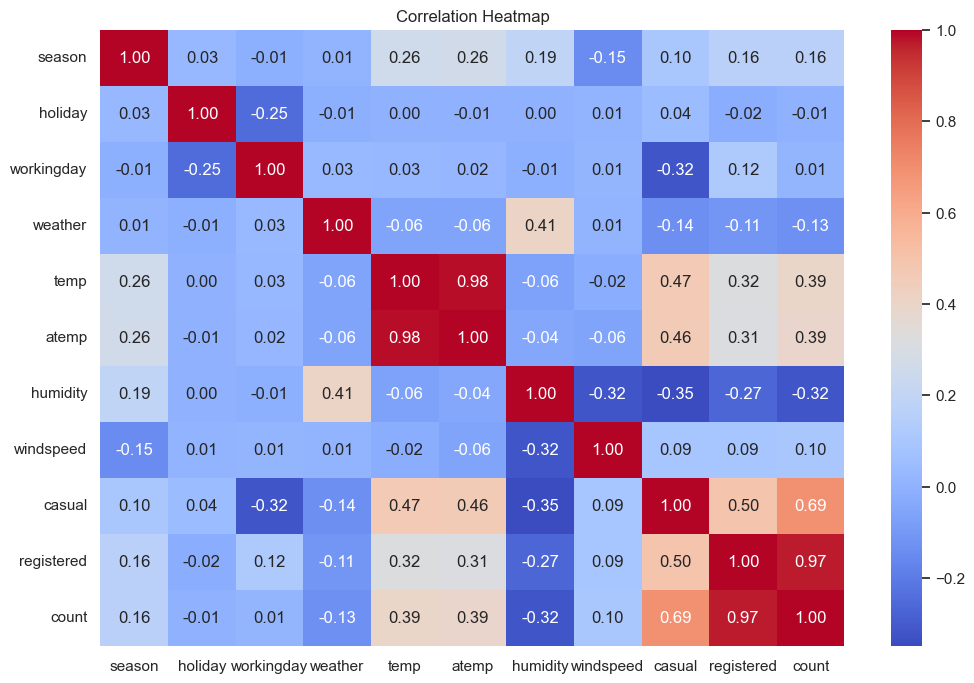

In [43]:
corr = df[num_cols].corr()


plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()